In [1]:
pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<a name="topo"></a>

# Sumário

Author - Pedro Silva Bastos Machado

Github - https://github.com/Pedros-Machado

Linkedin - https://www.linkedin.com/in/pedro-silva-machado-b47b23221/


1. [Dataset](#inicio)
<br>

2. [Mapas de Ocorrências de Tiro](#mapas)
    2.1 [Com morte de Civil](#mapascivil)
    2.2 [Com morte Policial](#mapaspolice)
    2.3 [Motivo: Execução](#mapasexec)
    2.4 [Motivo: Op. Policial](#mapasoppolice)
    2.5 [Motivo: Tentativa/Roubo](#mapasroubo)
<br>

3. [Estatísticas](#stats)
    3.1 [Ocorrências por Mês](#monthocorr)
    3.2 [Variação Mensal](#monthvar)
    3.3 [Mapa de Calor](#heatmap)
    3.4 [Matriz de Correlação](#correlation)
    3.5 [Scatterplot](#scatter)

<a name="inicio"></a>

# Dataset

Projeto desenvolvido a partir da API do Fogo Cruzado: https://api.fogocruzado.org.br

- Dados de 01/10/22 até 30/04/2023

In [2]:
import folium
from folium.plugins import HeatMap
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from geopy.geocoders import Nominatim
import seaborn as sns
from IPython.display import display
import warnings
warnings.filterwarnings('ignore') # Ignorar qualquer aviso...

sns.set_style("darkgrid")

bairros = ['Abolição', 'Acari', 'Água Santa', 'Alto da Boa Vista', 
                 'Anchieta', 'Andaraí', 'Anil', 'Bancários', 'Bangu', 'Barra da Tijuca', 'Barros Filho', 'Benfica', 
                 'Bento Ribeiro', 'Bonsucesso', 'Botafogo', 'Braz de Pina', 'Cachambi', 'Cacuia', 'Caju', 'Camorim', 
                 'Campinho', 'Campo dos Afonsos', 'Campo Grande', 'Cascadura', 'Catete', 'Catumbi', 'Cavalcanti', 'Centro', 
                 'Cidade Alta', 'Cidade de Deus', 'Cidade Nova', 'Cocotá', 'Coelho Neto', 'Colégio', 'Complexo do Alemão', 
                 'Cordovil', 'Cosme Velho', 'Costa Barros', 'Curicica', 'Del Castilho', 'Deodoro', 'Encantado', 
                 'Engenheiro Leal', 'Engenho da Rainha', 'Engenho de Dentro', 'Engenho Novo', 'Estácio', 'Flamengo', 
                 'Freguesia (Ilha do Governador)', 'Freguesia (Jacarepaguá)', 'Galeão', 'Gamboa', 'Gardênia Azul', 'Gávea', 
                 'Glória', 'Grajaú', 'Grumari', 'Guadalupe', 'Guaratiba', 'Higienópolis', 'Honório Gurgel', 'Humaitá', 
                 'Inhaúma', 'Inhoaíba', 'Ipanema', 'Irajá', 'Itanhangá', 'Jacaré', 'Jacarepaguá', 'Jacarezinho', 
                 'Jardim América', 'Jardim Botânico', 'Jardim Carioca', 'Jardim Guanabara', 'Jardim Sulacap', 'Joá', 'Lagoa', 
                 'Lapa', 'Laranjeiras', 'Leblon', 'Leme', 'Lins de Vasconcelos', 'Madureira', 'Magalhães Bastos', 'Mangueira', 
                 'Manguinhos', 'Maracanã', 'Maré', 'Marechal Hermes', 'Maria da Graça', 'Méier', 'Moneró', 'Olaria', 
                 'Oswaldo Cruz', 'Paciência', 'Padre Miguel', 'Paquetá', 'Parada de Lucas', 'Parque Anchieta', 
                 'Parque Columbia', 'Parque das Missões', 'Penha', 'Piedade', 'Pilares', 'Pitangueiras', 'Portuguesa', 
                 'Praça da Bandeira', 'Praia da Bandeira', 'Praia da Rosa', 'Praia de Botafogo', 'Praia do Flamengo', 
                 'Quintino Bocaiúva', 'Ramos', 'Realengo', "Recreio dos Bandeirantes","Riachuelo",
                 "Ribeira","Ricardo de Albuquerque","Rio Comprido","Rocha","Rocha Miranda","Rocinha","Sampaio" ,"Santa Cruz"
                 ,"Santa Teresa","Santíssimo","Santo Cristo","São Conrado","São Cristóvão","São Francisco Xavier","Saúde"
                 ,"Senador Camará","Senador Vasconcellos","Sepetiba","Tanque","Taquara","Tauá","Tijuca","Todos os Santos"
                 ,"Tomás Coelho","Turiaçu","Urca","Vargem Grande","Vargem Pequena","Vaz Lobo","Vicente de Carvalho"
                 ,"Vidigal","Vigário Geral","Vila Cosmos","Vila da Penha","Vila Isabel","Vila Militar","Vila Valqueire"
           ,"Vista Alegre","Zumbi"]


df = pd.read_csv("https://raw.githubusercontent.com/Pedros-Machado/RJ_ShootingStudy/main/crime_study.csv")

def bairro_get():
    padr = r'\b(' + '|'.join(bairros) + r')\b'

    y = df['local_ocorrencia'].str.extract(padr, flags=re.IGNORECASE)

    j = df['local_ocorrencia'].str.split(',').str[0].str.split('-').str[-1].str.strip()

    y[0] = y[0].fillna(j)
    
    return y[0]


df["bairro_ocorrencia"]=bairro_get()

def limpa_bairro():
    df.replace({"bairro_ocorrencia": {"Osvaldo Cruz": "Oswaldo Cruz",
                                      "Rua Clarimundo de Melo": "Piedade",
                                      "Rua Idume": "Brás de Pina", 
                                      "Rua Iguaperiba": "Brás de Pina","R. Abaíra": "Brás de Pina",
                                      "Rua Guilherme Veloso": "Praça Seca",
                                      "Rua Arnaldo Guinle": "Coelho Neto","R. Saçu":"Quintino Bocaiuva",
                                      "R. Cândido Benício": "Campinho","R. Edmundo Júnior":"Pavuna"
                                      ,"Av. Chrisóstomo Pimentel de Oliveira":"Pavuna","":"desconhecido",
                                      "Rua Florianópolis":"Praça Seca",'Rua Álvaro de Miranda':"Pilares"
                                      }}, inplace=True)
    df.loc[df["bairro_ocorrencia"] == "RJ", "bairro_ocorrencia"] = "Complexo do Chapadão"
    df.loc[df["local_ocorrencia"].str.contains("Vila Kennedy"), "bairro_ocorrencia"] = "Vila Kennedy"


limpa_bairro()

df.tail(3)

,id_ocorrencia,local_ocorrencia,latitude_ocorrencia,longitude_ocorrencia,data_ocorrencia,hora_ocorrencia,presen_agen_segur_ocorrencia,qtd_morto_civil_ocorrencia,qtd_morto_agen_segur_ocorrencia,qtd_ferido_civil_ocorrencia,...,vitima_idoso_qtd_feridos_oc,info_adicional_idoso_ferido_oc,informacao_via_oc,descricao_via_interrompida_oc,data_interrupcao_via_oc,data_liberacao_via_oc,outros_recortes,motivo_principal,motivo_complementar,bairro_ocorrencia
1287,56793,"Morro do Campinho, Complexo do Fubá - Cascadur...",-22.884480,-43.338170,2023-04-30,14:02:00,0,0,0,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,Não identificado,NaN,Campinho
1288,56794,"Complexo do Chapadão - Costa Barros, Rio de Ja...",-22.821014,-43.374957,2023-04-30,06:00:00,0,2,0,1,...,0,NaN,NaN,NaN,NaN,NaN,NaN,Disputa,NaN,Costa Barros
1289,56797,"Manguinhos - Av. Brasil, 4365 - Manguinhos, Ri...",-22.877484,-43.243838,2023-04-30,07:00:00,0,0,0,1,...,0,NaN,NaN,NaN,NaN,NaN,NaN,Outro,NaN,Manguinhos


<br>

<a name="mapas"></a>


# Mapas de Ocorrência de Tiro

[início](#topo)

In [3]:
def mapa_ocorrencia():
    mapa_centro = [-22.9068, -43.1729] 
    zoom_nivel = 11

    mapa = folium.Map(location=mapa_centro, zoom_start=zoom_nivel)

    for index, row in df.iterrows():
        folium.Marker([row['latitude_ocorrencia'], row['longitude_ocorrencia']]).add_to(mapa)
    return mapa

mapa_ocorrencia()

<br>

<a name="mapascivil"></a>

## Mapa de Ocorrência de Tiro com Morte de Civil

[início](#topo)

In [4]:
def mapa_ocorrencia_civilcasualty():
    mapa_centro = [-22.9068, -43.1729] 
    zoom_nivel = 11

    mapa = folium.Map(location=mapa_centro, zoom_start=zoom_nivel)

    for index, row in df.iterrows():
        if row['qtd_morto_civil_ocorrencia'] > 0:
            folium.Marker([row['latitude_ocorrencia'], row['longitude_ocorrencia']]).add_to(mapa)
    return mapa

mapa_ocorrencia_civilcasualty()

<br>

<a name="mapaspolice"></a>

## Mapa de Ocorrência de Tiro com Morte de Agente de Segurança

[início](#topo)

In [5]:
def mapa_ocorrencia_policecasualty():
    mapa_centro = [-22.9068, -43.1729] 
    zoom_nivel = 11

    mapa = folium.Map(location=mapa_centro, zoom_start=zoom_nivel)

    for index, row in df.iterrows():
        if row['qtd_morto_agen_segur_ocorrencia'] > 0:
            folium.Marker([row['latitude_ocorrencia'], row['longitude_ocorrencia']]).add_to(mapa)
    return mapa

mapa_ocorrencia_policecasualty()

<br>

<a name="mapasexec"></a>

## Mapa de Ocorrência de Tiro - Motivo Execução

[início](#topo)

In [6]:
def mapa_ocorrencia_execution():
    mapa_centro = [-22.9068, -43.1729] 
    zoom_nivel = 11

    mapa = folium.Map(location=mapa_centro, zoom_start=zoom_nivel)

    for index, row in df.iterrows():
        if row['motivo_principal'] == "Execução":
            folium.Marker([row['latitude_ocorrencia'], row['longitude_ocorrencia']]).add_to(mapa)
    return mapa

mapa_ocorrencia_execution()

<br>

<a name="mapasoppolice"></a>

## Mapa de Ocorrência de Tiro - Motivo Op. Policial

[início](#topo)

In [7]:
def mapa_ocorrencia_policeop():
    mapa_centro = [-22.9068, -43.1729] 
    zoom_nivel = 11

    mapa = folium.Map(location=mapa_centro, zoom_start=zoom_nivel)

    for index, row in df.iterrows():
        if row['motivo_principal'] == "Operação policial":
            folium.Marker([row['latitude_ocorrencia'], row['longitude_ocorrencia']]).add_to(mapa)
    return mapa

mapa_ocorrencia_policeop()

<br>

<a name="mapasroubo"></a>

## Mapa de Ocorrência de Tiro - Tentativa/Roubo

[início](#topo)

In [8]:
def mapa_ocorrencia_robbery():
    mapa_centro = [-22.9068, -43.1729] 
    zoom_nivel = 11

    mapa = folium.Map(location=mapa_centro, zoom_start=zoom_nivel)

    for index, row in df.iterrows():
        if row['motivo_principal'] == "Tentativa/Roubo":
            folium.Marker([row['latitude_ocorrencia'], row['longitude_ocorrencia']]).add_to(mapa)
    return mapa

mapa_ocorrencia_robbery()

<br>

<a name="stats"></a>

# Estatísticas
### Número de Ocorrências

Para melhor visualização, considerei no plot apenas bairros com __10 ou mais ocorrências__.

[início](#topo)

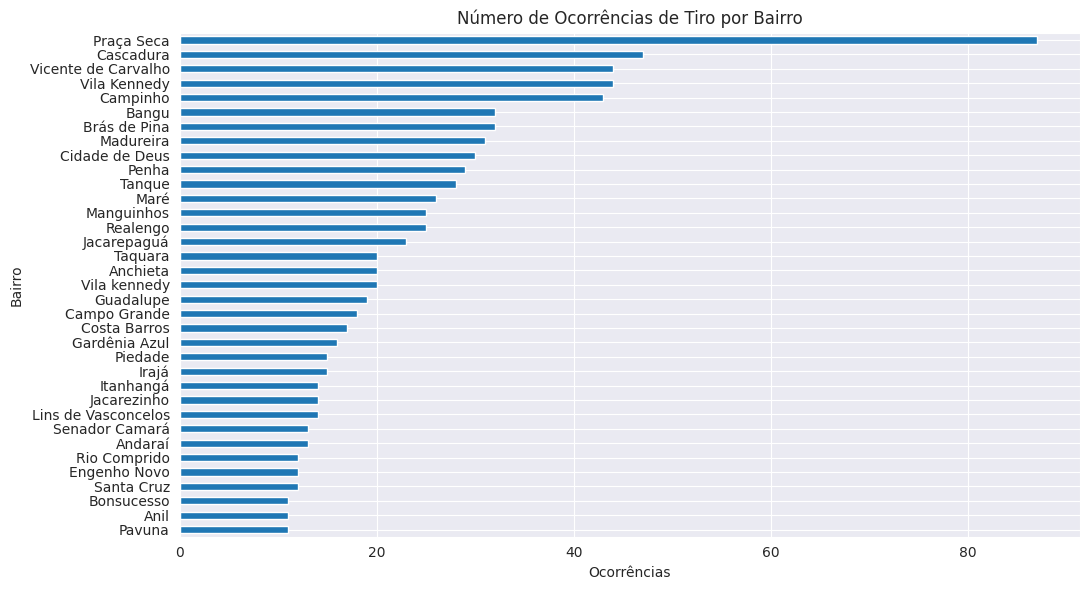

In [9]:
def ocorrencias_bairro():
    plt.rcParams.update({"font.size": 10})
    ocorrencias = df["bairro_ocorrencia"].value_counts()
    ocorrencias = ocorrencias[ocorrencias > 10]
    ocorrencias = ocorrencias.sort_values(ascending=True)
    plt.figure(figsize=(11, 6))
    ocorrencias.plot.barh()
    plt.title("Número de Ocorrências de Tiro por Bairro")
    plt.xlabel("Ocorrências")
    plt.ylabel("Bairro")
    plt.tight_layout()
    plt.show()
    
ocorrencias_bairro()

In [10]:
def check_ocorrencias(bairro):
    ocorrencias = df["bairro_ocorrencia"].value_counts()
    if bairro in ocorrencias:
        print(f"{bairro} teve {ocorrencias[bairro]} ocorrências de 01/10/22 até 30/04/2023.")
    else:
        print(f"{bairro} teve 0 ocorrências.")
        
check_ocorrencias("Barra da Tijuca")

Barra da Tijuca teve 2 ocorrências de 01/10/22 até 30/04/2023.


<a name="monthocorr"></a>

### Número de Ocorrências por Mês

[início](#topo)

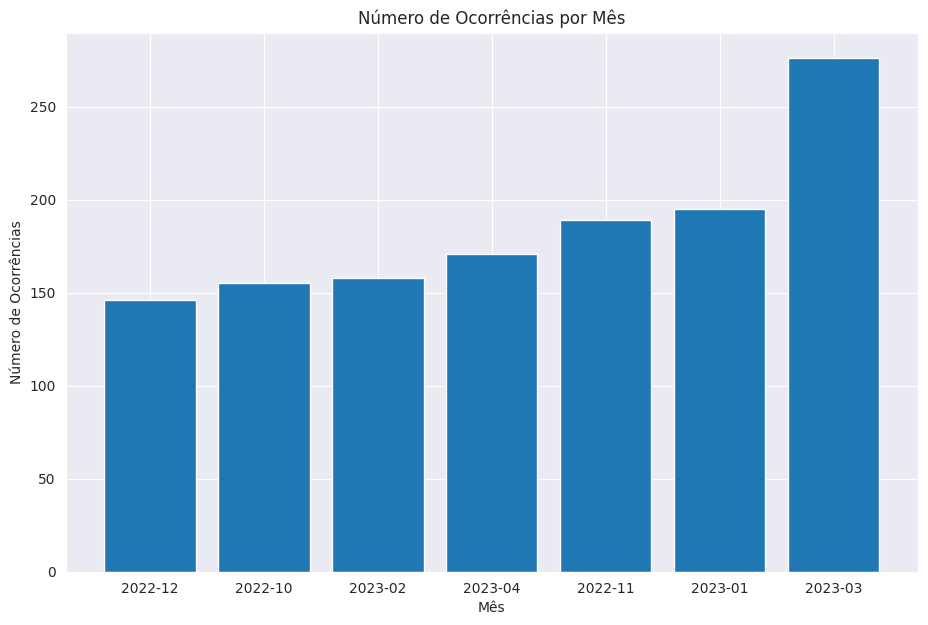

In [11]:
def mensal_ocorrencia():
    plt.rcParams.update({"font.size": 10})
    plt.figure(figsize=(11, 7))
    
    df['data_ocorrencia'] = pd.to_datetime(df['data_ocorrencia'])

    df_mensal = df.groupby(pd.Grouper(key='data_ocorrencia', freq='M'))['id_ocorrencia'].count()
    
    df_mensal_sorted = df_mensal.sort_values()
    
    plt.bar(x=df_mensal_sorted.index.strftime('%Y-%m'), height=df_mensal_sorted.values)
    plt.title("Número de Ocorrências por Mês")
    plt.xlabel("Mês")
    plt.ylabel("Número de Ocorrências")
    plt.show()

mensal_ocorrencia()

<a name="monthvar"></a>

### Variação Mensal de Ocorrências

[início](#topo)

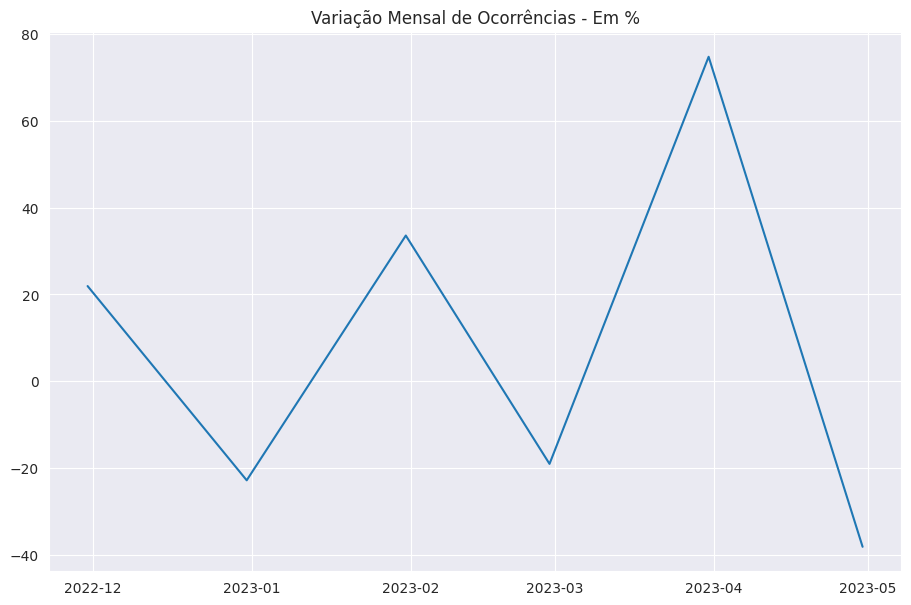

In [12]:
def mensal_dados():
    plt.rcParams.update({"font.size":10})

    plt.figure(figsize=(11,7))
    df['data_ocorrencia'] = pd.to_datetime(df['data_ocorrencia'])
    
    df_mensal = df.groupby(pd.Grouper(key='data_ocorrencia', freq='M')).count()

    df_mensal['crescimento'] = df_mensal['id_ocorrencia'].pct_change() * 100

    df_mensal = df_mensal.drop(df_mensal.index[0])
    
    plt.plot(df_mensal["crescimento"])
    plt.title("Variação Mensal de Ocorrências - Em %")
    plt.show()
    
mensal_dados()

<a name="heatmap"></a>

### Mapa de Calor

[início](#topo)

In [13]:
def heatmap():
    mapa_centro = [-22.9068, -43.1729] 
    zoom_nivel = 11
    
    rio_mapa = folium.Map(location=mapa_centro, zoom_start=11)
    
    bairro_count = df.groupby("bairro_ocorrencia").size().reset_index(name="counts")
    bairro_count["latitude_ocorrencia"] = df.groupby("bairro_ocorrencia")["latitude_ocorrencia"].mean().values
    bairro_count["longitude_ocorrencia"] = df.groupby("bairro_ocorrencia")["longitude_ocorrencia"].mean().values
    
    heat_dados = [[row["latitude_ocorrencia"], row["longitude_ocorrencia"], row["counts"]] for index, row in bairro_count.iterrows()]
    
    mapa = folium.Map(location=mapa_centro, zoom_start=11).add_child(folium.plugins.HeatMap(heat_dados))
    
    return mapa
    
heatmap()

<a name="correlation"></a>

### Matriz de Correlação
Dados de Desenvolvimento Fornecidos pela Prefeitura: https://www.data.rio/documents/58186e41a2ad410f9099af99e46366fd/about

[início](#topo)

In [14]:
df_idh = pd.read_csv("https://raw.githubusercontent.com/Pedros-Machado/RJ_ShootingStudy/main/idhbairro_data.csv")
df_idh.head(3)

,bairro,esperanca_vida,taxa_alfabetizacao,frequencia_escolar,renda_capita,idh
0,Gávea,80.45,98.08,118.13,2139.56,0.970
1,Leblon,79.47,99.01,105.18,2441.28,0.967
2,Jardim Guanabara,80.47,98.92,111.15,1316.86,0.963


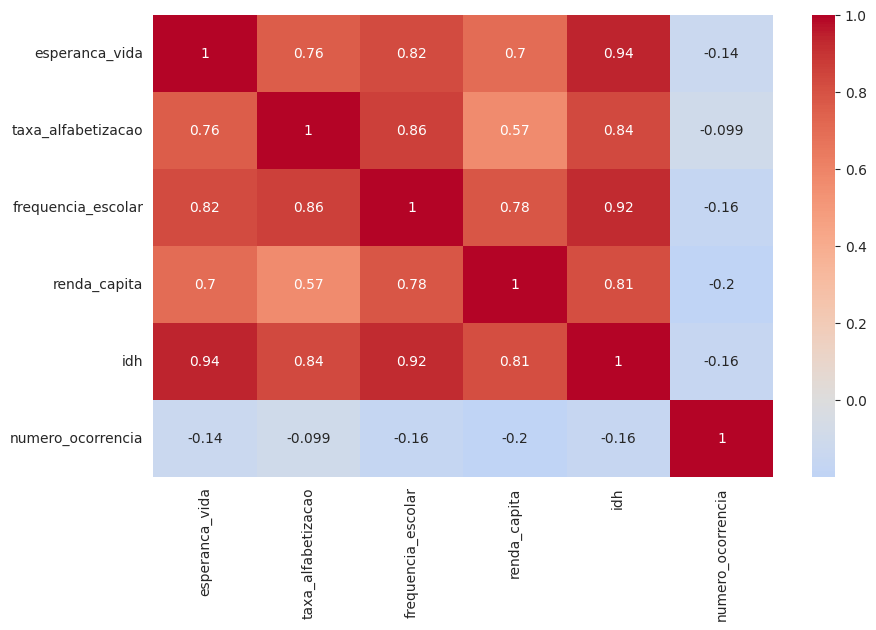

In [15]:
def correl():
    df_idh = pd.read_csv("https://raw.githubusercontent.com/Pedros-Machado/RJ_ShootingStudy/main/idhbairro_data.csv")
    df.rename(columns={"bairro_ocorrencia": "bairro"}, inplace=True)
    df_merge = pd.merge(df, df_idh, on="bairro", how="inner")
    
    df_contagem = df_merge[["bairro", "idh"]].drop_duplicates().reset_index(drop=True)
    df_contagem = df_contagem.merge(df_merge.groupby("bairro").size().reset_index(name="numero_ocorrencia"), on="bairro")

    df_idh = df_idh.merge(df_contagem, on="bairro")
    df_idh.drop(columns={"idh_y"},inplace=True)
    df_idh.rename(columns={"idh_x":"idh"},inplace=True)
        
    corr_matrix = df_idh.corr()
    
    plt.figure(figsize=(10,6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
    plt.show()

correl()

<a name="scatter"></a>

### Scatterplot
Tentando entender melhor a __Relação entre Renda Per Capita e Ocorrências de tiro__.

Outliers foram removidos para garantir uma amostra limpa.

[início](#topo)

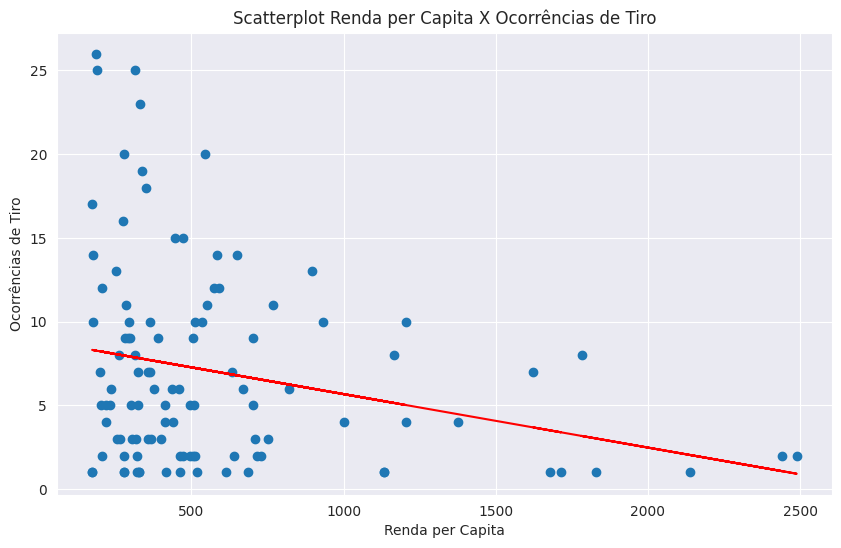

In [16]:
def scatter():
    df_idh = pd.read_csv("https://raw.githubusercontent.com/Pedros-Machado/RJ_ShootingStudy/main/idhbairro_data.csv")
    df.rename(columns={"bairro_ocorrencia": "bairro"}, inplace=True)
    df_merge = pd.merge(df, df_idh, on="bairro", how="inner")

    df_contagem = df_merge[["bairro", "idh"]].drop_duplicates().reset_index(drop=True)
    df_contagem = df_contagem.merge(df_merge.groupby("bairro").size().reset_index(name="numero_ocorrencia"), on="bairro")

    df_idh = df_idh.merge(df_contagem, on="bairro")
    df_idh.drop(columns={"idh_y"}, inplace=True)
    df_idh.rename(columns={"idh_x": "idh"}, inplace=True)

    # Removendo outliers de numero_ocorrencia...
    Q1 = df_idh['numero_ocorrencia'].quantile(0.25)
    Q3 = df_idh['numero_ocorrencia'].quantile(0.75)
    IQR = Q3 - Q1
    df_idh_filtrada = df_idh[(df_idh['numero_ocorrencia'] >= Q1 - 1.5 * IQR) &
                             (df_idh['numero_ocorrencia'] <= Q3 + 1.5 * IQR)]

    # Filtrando outliers em renda_capita...
    df_idh_filtrada = df_idh_filtrada[df_idh_filtrada['renda_capita'] <= 2500]

    x = df_idh_filtrada["renda_capita"]
    y = df_idh_filtrada["numero_ocorrencia"]

    #Calculando o valor de m...
    m = (len(df_idh_filtrada) * (x*y).sum() - x.sum()*y.sum()) / (len(df_idh_filtrada) * (x**2).sum() - (x.sum())**2)

    #Calculando o valor de b...
    b = (sum(y)-m*sum(x))/len(df_idh_filtrada)

    #Criando uma lista de predições...
    pred_lista = []

    for i in x:
        y_pred = m*i+b
        pred_lista.append(y_pred)

    df_idh_filtrada["Predições"] = pred_lista

    plt.figure(figsize=(10,6))

    plt.scatter(x,y)
    plt.plot(x,df_idh_filtrada["Predições"],color="Red")

    plt.xlabel("Renda per Capita")
    plt.ylabel("Ocorrências de Tiro")
    plt.title("Scatterplot Renda per Capita X Ocorrências de Tiro")

    plt.show()

scatter()